# Distributions

Download & install packages needed for this notebook

In [1]:
include("utils.jl"); using .Utils

checkpkgs("StatsBase", "RecipesBase", "Plots", "DataFrames", "PrettyTables", "Statistics")

In [2]:
using StatsBase
using RecipesBase
using Plots
using DataFrames

In [3]:
include("empiricaldist.jl"); using .EmpiricalDist

## Probability Mass Functions

In [4]:
coin = Pmf()
coin["heads"] = 1/2
coin["tails"] = 1/2
coin

┌───────┬───────┐
│       │ probs │
├───────┼───────┤
│ heads │   0.5 │
│ tails │   0.5 │
└───────┴───────┘


In [5]:
die = pmffromseq([1,2,3,4,5,6])
die

┌───┬──────────┐
│   │    probs │
├───┼──────────┤
│ 1 │ 0.166667 │
│ 2 │ 0.166667 │
│ 3 │ 0.166667 │
│ 4 │ 0.166667 │
│ 5 │ 0.166667 │
│ 6 │ 0.166667 │
└───┴──────────┘


In [6]:
letters = pmffromseq(collect("Mississippi"))
letters

┌───┬───────────┐
│   │     probs │
├───┼───────────┤
│ M │ 0.0909091 │
│ i │  0.363636 │
│ p │  0.181818 │
│ s │  0.363636 │
└───┴───────────┘


In [7]:
letters['s']

0.36363636363636365

In [8]:
try
    letters['t']
catch e
    print(typeof(e)) # KeyError
end

KeyError

In [9]:
letters('s')

0.36363636363636365

In [10]:
letters('t')

0.0

In [11]:
die([1,4,7])

3-element Vector{Float64}:
 0.16666666666666666
 0.16666666666666666
 0.0

## The Cookie Problem Revisited

In [12]:
prior = pmffromseq(["Bowl 1", "Bowl 2"])
prior

┌────────┬───────┐
│        │ probs │
├────────┼───────┤
│ Bowl 1 │   0.5 │
│ Bowl 2 │   0.5 │
└────────┴───────┘


In [13]:
likelihood_vanilla = [0.75, 0.5]
posterior = prior .* likelihood_vanilla
posterior

┌────────┬───────┐
│        │ probs │
├────────┼───────┤
│ Bowl 1 │ 0.375 │
│ Bowl 2 │  0.25 │
└────────┴───────┘


In [14]:
normalize!(posterior)

0.625

In [15]:
posterior

┌────────┬───────┐
│        │ probs │
├────────┼───────┤
│ Bowl 1 │   0.6 │
│ Bowl 2 │   0.4 │
└────────┴───────┘


In [16]:
posterior["Bowl 1"]

0.6

In [17]:
posterior .*= likelihood_vanilla
normalize!(posterior)
posterior

┌────────┬──────────┐
│        │    probs │
├────────┼──────────┤
│ Bowl 1 │ 0.692308 │
│ Bowl 2 │ 0.307692 │
└────────┴──────────┘


In [18]:
likelihood_chocolate = [0.25, 0.5];

In [19]:
posterior .*= likelihood_chocolate
normalize!(posterior)
posterior

┌────────┬──────────┐
│        │    probs │
├────────┼──────────┤
│ Bowl 1 │ 0.529412 │
│ Bowl 2 │ 0.470588 │
└────────┴──────────┘


## 101 Bowls

In [20]:
hypos = collect(0:100);

In [21]:
prior = Pmf(1, hypos)
normalize!(prior)

101.0

In [22]:
# Julia prefers first() over head()
first(prior, 3)

┌───┬────────────┐
│   │      probs │
├───┼────────────┤
│ 0 │ 0.00990099 │
│ 1 │ 0.00990099 │
│ 2 │ 0.00990099 │
└───┴────────────┘


In [23]:
likelihood_vanilla = hypos./100
likelihood_vanilla[1:5]

5-element Vector{Float64}:
 0.0
 0.01
 0.02
 0.03
 0.04

In [24]:
posterior1 = prior .* likelihood_vanilla
normalize!(posterior1)
first(posterior1,3)

┌───┬────────────┐
│   │      probs │
├───┼────────────┤
│ 0 │        0.0 │
│ 1 │ 0.00019802 │
│ 2 │ 0.00039604 │
└───┴────────────┘


In [25]:
function decorate_bowls!(title)
    plot!(xlabel="Bowl #", ylabel="PMF", legend=:topleft, title=title)
end

decorate_bowls! (generic function with 1 method)

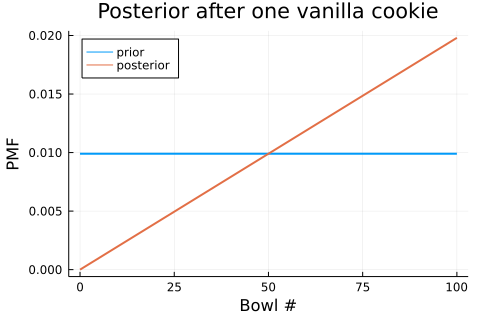

In [26]:
plot(prior; label="prior")
plot!(posterior1; label="posterior")
decorate_bowls!("Posterior after one vanilla cookie")

In [27]:
posterior2 = posterior1 .* likelihood_vanilla
normalize!(posterior2)

0.6699999999999998

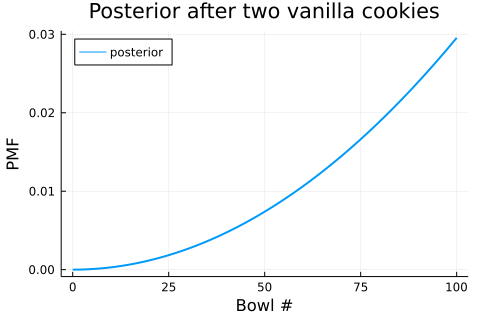

In [28]:
plot(posterior2, label="posterior")
decorate_bowls!("Posterior after two vanilla cookies")

In [29]:
likelihood_chocolate = 1 .- hypos./100

posterior3 = posterior2 .* likelihood_chocolate
normalize!(posterior3)

0.2462686567164178

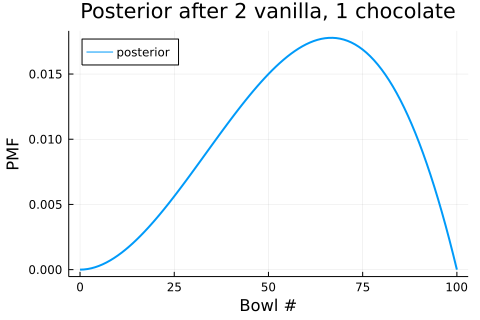

In [30]:
plot(posterior3, label="posterior")
decorate_bowls!("Posterior after 2 vanilla, 1 chocolate")

In [31]:
# Julia: argmax() instead of idxmax()
argmax(posterior3)

67

In [32]:
maxprob(posterior3)

67

## The Dice Problem

In [33]:
hypos = [6, 8, 12];

In [34]:
prior = Pmf(1/3, hypos)

┌────┬──────────┐
│    │    probs │
├────┼──────────┤
│  6 │ 0.333333 │
│  8 │ 0.333333 │
│ 12 │ 0.333333 │
└────┴──────────┘


In [35]:
prior.qs # === keys(prior)

3-element Vector{Int64}:
  6
  8
 12

In [36]:
prior.ps # === values(prior)

3-element Vector{Float64}:
 0.3333333333333333
 0.3333333333333333
 0.3333333333333333

In [37]:
likelihood1 = 1/6, 1/8, 1/12

(0.16666666666666666, 0.125, 0.08333333333333333)

In [38]:
posterior = prior .* likelihood1
normalize!(posterior)
posterior

┌────┬──────────┐
│    │    probs │
├────┼──────────┤
│  6 │ 0.444444 │
│  8 │ 0.333333 │
│ 12 │ 0.222222 │
└────┴──────────┘


In [39]:
likelihood2 = 0, 1/8, 1/12

(0, 0.125, 0.08333333333333333)

In [40]:
posterior .*= likelihood2
normalize!(posterior)
posterior

┌────┬──────────┐
│    │    probs │
├────┼──────────┤
│  6 │      0.0 │
│  8 │ 0.692308 │
│ 12 │ 0.307692 │
└────┴──────────┘


In [41]:
"""Update pmf based on new data."""
function update_dice!(pmf, data)
    hypos = pmf.qs
    likelihood = 1 ./ hypos
    impossible = (data .> hypos)
    likelihood[impossible] .= 0
    pmf .*= likelihood
    normalize!(pmf)
end

update_dice!

In [42]:
pmf = copy(prior)

┌────┬──────────┐
│    │    probs │
├────┼──────────┤
│  6 │ 0.333333 │
│  8 │ 0.333333 │
│ 12 │ 0.333333 │
└────┴──────────┘


In [43]:
update_dice!(pmf, 1)
update_dice!(pmf, 7)
pmf

┌────┬──────────┐
│    │    probs │
├────┼──────────┤
│  6 │      0.0 │
│  8 │ 0.692308 │
│ 12 │ 0.307692 │
└────┴──────────┘


## Exercises

In [44]:
pmf = copy(prior)
for data in [1, 3, 5, 7]
    update_dice!(pmf, data)
end
pmf

┌────┬──────────┐
│    │    probs │
├────┼──────────┤
│  6 │      0.0 │
│  8 │ 0.835052 │
│ 12 │ 0.164948 │
└────┴──────────┘


In [45]:
ps = [1,2,3,4,5]
qs = [4,6,8,12,20]
pmf = Pmf(ps, qs)
update_dice!(pmf, 7)
pmf

┌────┬──────────┐
│    │    probs │
├────┼──────────┤
│  4 │      0.0 │
│  6 │      0.0 │
│  8 │ 0.391304 │
│ 12 │ 0.347826 │
│ 20 │  0.26087 │
└────┴──────────┘


In [46]:
hypos = ["BlackWhite", "RedGreenBlue"]
prior = Pmf(1/2, hypos)
likelihood = 1/2, 1/3
posterior = prior .* likelihood
normalize!(posterior)
posterior

┌──────────────┬───────┐
│              │ probs │
├──────────────┼───────┤
│   BlackWhite │   0.6 │
│ RedGreenBlue │   0.4 │
└──────────────┴───────┘


In [47]:
posterior["BlackWhite"] / 2

0.30000000000000004

In [48]:
table = DataFrame(index=["identical", "fraternal"])
table.prior = [1/3, 2/3]
table.likelihood = [1, 1/2]

table.unnorm = table.prior .* table.likelihood
prob_data = sum(table.unnorm)

table.posterior = table.unnorm ./ prob_data
table

,index,prior,likelihood,unnorm,posterior
,String,Float64,Float64,Float64,Float64
1,identical,0.333333,1.0,0.333333,0.5
2,fraternal,0.666667,0.5,0.333333,0.5


In [49]:
hypos = ["identical", "fraternal"]
prior = Pmf([1/3, 2/3], hypos)

┌───────────┬──────────┐
│           │    probs │
├───────────┼──────────┤
│ identical │ 0.333333 │
│ fraternal │ 0.666667 │
└───────────┴──────────┘


In [50]:
likelihood = [1, 1/2]
posterior = prior .* likelihood
normalize!(posterior)
posterior

┌───────────┬───────┐
│           │ probs │
├───────────┼───────┤
│ identical │   0.5 │
│ fraternal │   0.5 │
└───────────┴───────┘
